In [1]:
import tensorflow as tf
from matplotlib import patches, rcParams, pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

[0.  0.5 1. ]


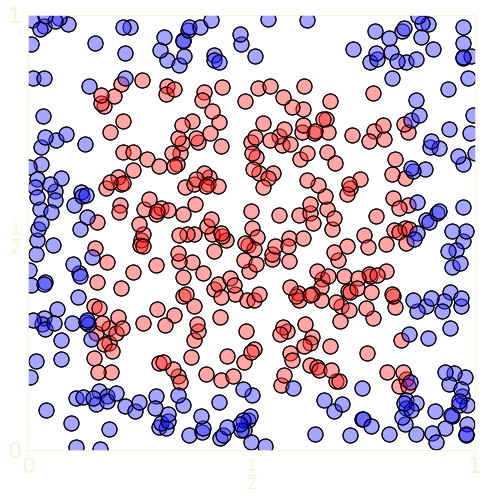

In [2]:
x = np.random.uniform(size=(512, 2)) # 512 random data points in unit square
y = np.logical_and(
        np.abs(x[:,0] - 0.5) < 0.5/np.sqrt(2),
        np.abs(x[:,1] - 0.5) < 0.5/np.sqrt(2)).astype(np.int)
x1 = x[y == 0, :]
x0 = x[y == 1, :]

rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.spines['bottom'].set_color("papayawhip")
ax.spines['top'].set_color("papayawhip") 
ax.spines['right'].set_color("papayawhip")
ax.spines['left'].set_color("papayawhip")


ax.set_xticks([0, 0.5, 1])
ax.set_xticklabels(["0", "$\\frac{1}{2}$", "1"])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(["0", "$\\frac{1}{2}$", "1"])
ax.tick_params(color="papayawhip", labelcolor="papayawhip")

print(ax.get_xticks())

ax.plot(*x0.T, 'o', mfc=(1, 1, 1, 1), mec='k', markersize=15)
ax.plot(*x1.T, 'o', mfc=(1, 1, 1, 1), mec='k',markersize=15)

ax.plot(*x0.T, 'o', mfc=(1, 0, 0, 0.35), mec='k', markersize=15)
ax.plot(*x1.T, 'o', mfc=(0, 0, 1, 0.35), mec='k',markersize=15)

fig.savefig("squares-samples.svg", bbox_inches="tight", transparent=True)

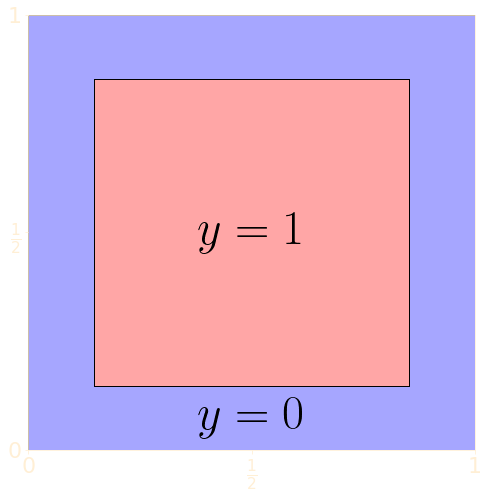

In [3]:
rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(8, 8), frameon=False)
ax1 = plt.gca()
ax1.set_xlim(-0, 1)
ax1.set_ylim(-0, 1)

big_rect = patches.Rectangle((0, 0), 1, 1, fc=(0, 0, 1, 0.35), ec='k')
a = 1/np.sqrt(2)
little_rect = patches.Rectangle((0.5*(1-a), 0.5 - 0.5*a), a, a, fc=(1, 0, 0, 0.35), ec='k')
little_rect_bg = patches.Rectangle((0.5 - 0.5*a, 0.5 - 0.5*a), a, a, fc=(1, 1, 1, 1), ec='k')
ax1.add_patch(big_rect)
ax1.add_patch(little_rect_bg)
ax1.add_patch(little_rect)
ax1.text(0.5, 0.5, "$y=1$", usetex=True, fontsize=48, va="center", ha="center")
ax1.text(0.5, 0.25 - 0.25*a, "$y=0$", usetex=True, fontsize=48, va="center", ha="center")

ax1.spines['bottom'].set_color("papayawhip")
ax1.spines['top'].set_color("papayawhip") 
ax1.spines['right'].set_color("papayawhip")
ax1.spines['left'].set_color("papayawhip")

ax1.set_xticks([0, 0.5, 1])
ax1.set_xticklabels(["0", "$\\frac{1}{2}$", "1"])
ax1.set_yticks([0, 0.5, 1])
ax1.set_yticklabels(["0", "$\\frac{1}{2}$", "1"])
ax1.tick_params(color="papayawhip", labelcolor="papayawhip")

fig.savefig("squares.svg", bbox_inches="tight")
# ax1.text(0.5, 1 - 0.25 + 0.25*a, "$S$", fontsize=32, va="center", ha="center")
# ax1.text(0.5, 0.5 + 0.25*a, "$T$", fontsize=32, va="center", ha="center")

# ax2.plot(*x0.T, 'o', mfc=(1, 0, 0, 0.35), mec='k', markersize=15)
# ax2.plot(*x1.T, 'o', mfc=(0, 0, 1, 0.35), mec='k',markersize=15)

In [20]:
from tensorflow.keras.callbacks import LambdaCallback

x_train = np.random.uniform(size=(512, 2)) # 1024 random data points in unit square
y_train = np.logical_and(
        np.abs(x_train[:,0] - 0.5) < 0.5/np.sqrt(2),
        np.abs(x_train[:,1] - 0.5) < 0.5/np.sqrt(2))

x_test = np.random.uniform(size=(512, 2)) # 512 random data points in unit square
y_test = np.logical_and(
        np.abs(x_test[:,0] - 0.5) < 0.5/np.sqrt(2),
        np.abs(x_test[:,1] - 0.5) < 0.5/np.sqrt(2))

n = 128
t = np.linspace(0, 1, n)
X0, X1 = np.meshgrid(t, t)
x_grid = np.concatenate([X0.reshape((-1, 1)), X1.reshape((-1, 1))], axis=1)

period = 5
def on_epoch_end(epoch, _logs):
    if (epoch - 1) % period == 0:
        Y = model.predict(x_grid).reshape((n, n))
        fig = plt.figure(figsize=(8, 8), facecolor="#191919")

        ax = fig.gca()
        ax.spines['bottom'].set_color("papayawhip")
        ax.spines['top'].set_color("papayawhip") 
        ax.spines['right'].set_color("papayawhip")
        ax.spines['left'].set_color("papayawhip")
        
        ax.set_xticks([0, 0.5, 1])
        ax.set_xticklabels(["0", "$\\frac{1}{2}$", "1"])
        ax.set_yticks([0, 0.5, 1])
        ax.set_yticklabels(["0", "$\\frac{1}{2}$", "1"])
        ax.tick_params(color="papayawhip", labelcolor="papayawhip")

        ax.contourf(X0, X1, Y, levels=[0, 0.5, 1], colors=[(0, 0, 1, 0.35), (1, 0, 0, 0.35), (1, 0, 0, 0.35)])
        ax.contour(X0, X1, Y, levels=[0.5], colors=['k'])
        fig.savefig(f"regions-{epoch:03d}.jpg", bbox_inches="tight", facecolor=fig.get_facecolor())
        print(f"saved regions-{epoch:03d}.jpg")
        plt.close()

callback = LambdaCallback(on_epoch_end=on_epoch_end)

model = Sequential([Input(2),
                    Dense(10, activation="relu"),
                    Dense(10, activation="relu"),
                    Dense(1, activation="sigmoid")])

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          epochs=500, callbacks=[callback])





Train on 512 samples, validate on 512 samples
Epoch 1/500
512/512 [==============================] - 0s 670us/sample - loss: 0.6926 - accuracy: 0.5098 - val_loss: 0.6916 - val_accuracy: 0.5020
Epoch 2/500
512/512 [==============================] - 0s 672us/sample - loss: 0.6908 - accuracy: 0.6602 - val_loss: 0.6896 - val_accuracy: 0.7383
Epoch 3/500
512/512 [==============================] - 0s 69us/sample - loss: 0.6892 - accuracy: 0.7480 - val_loss: 0.6881 - val_accuracy: 0.7402
Epoch 4/500
512/512 [==============================] - 0s 78us/sample - loss: 0.6876 - accuracy: 0.6895 - val_loss: 0.6863 - val_accuracy: 0.6816
Epoch 5/500
512/512 [==============================] - 0s 67us/sample - loss: 0.6857 - accuracy: 0.6641 - val_loss: 0.6843 - val_accuracy: 0.6777
Epoch 6/500
512/512 [==============================] - 0s 71us/sample - loss: 0.6832 - accuracy: 0.6562 - val_loss: 0.6813 - val_accuracy: 0.6602
Epoch 7/500
512/512 [==============================] - 0s 667us/sample - los

512/512 [==============================] - 0s 63us/sample - loss: 0.5496 - accuracy: 0.7520 - val_loss: 0.5642 - val_accuracy: 0.6973
Epoch 50/500
512/512 [==============================] - 0s 62us/sample - loss: 0.5470 - accuracy: 0.7559 - val_loss: 0.5622 - val_accuracy: 0.6973
Epoch 51/500
512/512 [==============================] - 0s 63us/sample - loss: 0.5459 - accuracy: 0.7441 - val_loss: 0.5599 - val_accuracy: 0.6914
Epoch 52/500
512/512 [==============================] - 0s 688us/sample - loss: 0.5440 - accuracy: 0.7441 - val_loss: 0.5593 - val_accuracy: 0.6973
Epoch 53/500
512/512 [==============================] - 0s 67us/sample - loss: 0.5419 - accuracy: 0.7539 - val_loss: 0.5574 - val_accuracy: 0.6992
Epoch 54/500
512/512 [==============================] - 0s 61us/sample - loss: 0.5393 - accuracy: 0.7559 - val_loss: 0.5558 - val_accuracy: 0.7031
Epoch 55/500
512/512 [==============================] - 0s 62us/sample - loss: 0.5376 - accuracy: 0.7559 - val_loss: 0.5545 - val_

Epoch 98/500
512/512 [==============================] - 0s 64us/sample - loss: 0.4844 - accuracy: 0.7695 - val_loss: 0.5100 - val_accuracy: 0.7246
Epoch 99/500
512/512 [==============================] - 0s 62us/sample - loss: 0.4830 - accuracy: 0.7656 - val_loss: 0.5087 - val_accuracy: 0.7285
Epoch 100/500
512/512 [==============================] - 0s 61us/sample - loss: 0.4817 - accuracy: 0.7715 - val_loss: 0.5072 - val_accuracy: 0.7305
Epoch 101/500
512/512 [==============================] - 0s 63us/sample - loss: 0.4794 - accuracy: 0.7656 - val_loss: 0.5055 - val_accuracy: 0.7246
Epoch 102/500
512/512 [==============================] - 0s 651us/sample - loss: 0.4781 - accuracy: 0.7715 - val_loss: 0.5035 - val_accuracy: 0.7324
Epoch 103/500
512/512 [==============================] - 0s 65us/sample - loss: 0.4767 - accuracy: 0.7695 - val_loss: 0.5019 - val_accuracy: 0.7305
Epoch 104/500
512/512 [==============================] - 0s 72us/sample - loss: 0.4743 - accuracy: 0.7754 - val_l

Epoch 147/500
512/512 [==============================] - 0s 760us/sample - loss: 0.3950 - accuracy: 0.8320 - val_loss: 0.4195 - val_accuracy: 0.8203
Epoch 148/500
512/512 [==============================] - 0s 64us/sample - loss: 0.3930 - accuracy: 0.8359 - val_loss: 0.4180 - val_accuracy: 0.8203
Epoch 149/500
512/512 [==============================] - 0s 62us/sample - loss: 0.3931 - accuracy: 0.8340 - val_loss: 0.4155 - val_accuracy: 0.8320
Epoch 150/500
512/512 [==============================] - 0s 64us/sample - loss: 0.3893 - accuracy: 0.8340 - val_loss: 0.4155 - val_accuracy: 0.8125
Epoch 151/500
512/512 [==============================] - 0s 66us/sample - loss: 0.3881 - accuracy: 0.8340 - val_loss: 0.4121 - val_accuracy: 0.8301
Epoch 152/500
512/512 [==============================] - 1s 1ms/sample - loss: 0.3851 - accuracy: 0.8359 - val_loss: 0.4106 - val_accuracy: 0.8242
Epoch 153/500
512/512 [==============================] - 0s 71us/sample - loss: 0.3835 - accuracy: 0.8359 - val_

512/512 [==============================] - 0s 62us/sample - loss: 0.3109 - accuracy: 0.8926 - val_loss: 0.3334 - val_accuracy: 0.8770
Epoch 196/500
512/512 [==============================] - 0s 63us/sample - loss: 0.3100 - accuracy: 0.8926 - val_loss: 0.3315 - val_accuracy: 0.8809
Epoch 197/500
512/512 [==============================] - 0s 720us/sample - loss: 0.3079 - accuracy: 0.8945 - val_loss: 0.3297 - val_accuracy: 0.8828
Epoch 198/500
512/512 [==============================] - 0s 63us/sample - loss: 0.3062 - accuracy: 0.8926 - val_loss: 0.3288 - val_accuracy: 0.8828
Epoch 199/500
512/512 [==============================] - 0s 59us/sample - loss: 0.3048 - accuracy: 0.8926 - val_loss: 0.3269 - val_accuracy: 0.8828
Epoch 200/500
512/512 [==============================] - 0s 60us/sample - loss: 0.3033 - accuracy: 0.8945 - val_loss: 0.3256 - val_accuracy: 0.8887
Epoch 201/500
512/512 [==============================] - 0s 63us/sample - loss: 0.3020 - accuracy: 0.8945 - val_loss: 0.3238 

512/512 [==============================] - 0s 64us/sample - loss: 0.2498 - accuracy: 0.9141 - val_loss: 0.2750 - val_accuracy: 0.9043
Epoch 244/500
512/512 [==============================] - 0s 61us/sample - loss: 0.2493 - accuracy: 0.9238 - val_loss: 0.2731 - val_accuracy: 0.9199
Epoch 245/500
512/512 [==============================] - 0s 62us/sample - loss: 0.2465 - accuracy: 0.9199 - val_loss: 0.2725 - val_accuracy: 0.9082
Epoch 246/500
512/512 [==============================] - 0s 62us/sample - loss: 0.2457 - accuracy: 0.9199 - val_loss: 0.2711 - val_accuracy: 0.9121
Epoch 247/500
512/512 [==============================] - 0s 666us/sample - loss: 0.2447 - accuracy: 0.9258 - val_loss: 0.2698 - val_accuracy: 0.9238
Epoch 248/500
512/512 [==============================] - 0s 67us/sample - loss: 0.2440 - accuracy: 0.9180 - val_loss: 0.2701 - val_accuracy: 0.9082
Epoch 249/500
512/512 [==============================] - 0s 64us/sample - loss: 0.2425 - accuracy: 0.9199 - val_loss: 0.2682 

Epoch 292/500
512/512 [==============================] - 0s 661us/sample - loss: 0.2093 - accuracy: 0.9355 - val_loss: 0.2354 - val_accuracy: 0.9160
Epoch 293/500
512/512 [==============================] - 0s 62us/sample - loss: 0.2108 - accuracy: 0.9336 - val_loss: 0.2353 - val_accuracy: 0.9160
Epoch 294/500
512/512 [==============================] - 0s 61us/sample - loss: 0.2090 - accuracy: 0.9355 - val_loss: 0.2360 - val_accuracy: 0.9121
Epoch 295/500
512/512 [==============================] - 0s 61us/sample - loss: 0.2072 - accuracy: 0.9297 - val_loss: 0.2336 - val_accuracy: 0.9316
Epoch 296/500
512/512 [==============================] - 0s 61us/sample - loss: 0.2073 - accuracy: 0.9375 - val_loss: 0.2330 - val_accuracy: 0.9219
Epoch 297/500
512/512 [==============================] - 0s 662us/sample - loss: 0.2072 - accuracy: 0.9336 - val_loss: 0.2331 - val_accuracy: 0.9102
Epoch 298/500
512/512 [==============================] - 0s 62us/sample - loss: 0.2052 - accuracy: 0.9355 - va

512/512 [==============================] - 0s 65us/sample - loss: 0.1830 - accuracy: 0.9355 - val_loss: 0.2084 - val_accuracy: 0.9219
Epoch 341/500
512/512 [==============================] - 0s 63us/sample - loss: 0.1832 - accuracy: 0.9414 - val_loss: 0.2060 - val_accuracy: 0.9375
Epoch 342/500
512/512 [==============================] - 0s 615us/sample - loss: 0.1813 - accuracy: 0.9434 - val_loss: 0.2061 - val_accuracy: 0.9297
Epoch 343/500
512/512 [==============================] - 0s 64us/sample - loss: 0.1817 - accuracy: 0.9395 - val_loss: 0.2056 - val_accuracy: 0.9316
Epoch 344/500
512/512 [==============================] - 0s 62us/sample - loss: 0.1807 - accuracy: 0.9453 - val_loss: 0.2043 - val_accuracy: 0.9395
Epoch 345/500
512/512 [==============================] - 0s 62us/sample - loss: 0.1800 - accuracy: 0.9492 - val_loss: 0.2045 - val_accuracy: 0.9297
Epoch 346/500
512/512 [==============================] - 0s 65us/sample - loss: 0.1816 - accuracy: 0.9453 - val_loss: 0.2038 

512/512 [==============================] - 0s 65us/sample - loss: 0.1615 - accuracy: 0.9492 - val_loss: 0.1831 - val_accuracy: 0.9570
Epoch 389/500
512/512 [==============================] - 0s 61us/sample - loss: 0.1606 - accuracy: 0.9512 - val_loss: 0.1829 - val_accuracy: 0.9414
Epoch 390/500
512/512 [==============================] - 0s 62us/sample - loss: 0.1605 - accuracy: 0.9512 - val_loss: 0.1822 - val_accuracy: 0.9473
Epoch 391/500
512/512 [==============================] - 0s 72us/sample - loss: 0.1607 - accuracy: 0.9531 - val_loss: 0.1814 - val_accuracy: 0.9512
Epoch 392/500
512/512 [==============================] - 0s 638us/sample - loss: 0.1621 - accuracy: 0.9414 - val_loss: 0.1834 - val_accuracy: 0.9316
Epoch 393/500
512/512 [==============================] - 0s 63us/sample - loss: 0.1595 - accuracy: 0.9531 - val_loss: 0.1810 - val_accuracy: 0.9570
Epoch 394/500
512/512 [==============================] - 0s 61us/sample - loss: 0.1588 - accuracy: 0.9531 - val_loss: 0.1811 

Epoch 437/500
512/512 [==============================] - 0s 651us/sample - loss: 0.1455 - accuracy: 0.9570 - val_loss: 0.1668 - val_accuracy: 0.9531
Epoch 438/500
512/512 [==============================] - 0s 66us/sample - loss: 0.1447 - accuracy: 0.9570 - val_loss: 0.1662 - val_accuracy: 0.9609
Epoch 439/500
512/512 [==============================] - 0s 63us/sample - loss: 0.1446 - accuracy: 0.9531 - val_loss: 0.1660 - val_accuracy: 0.9551
Epoch 440/500
512/512 [==============================] - 0s 64us/sample - loss: 0.1442 - accuracy: 0.9570 - val_loss: 0.1667 - val_accuracy: 0.9492
Epoch 441/500
512/512 [==============================] - 0s 64us/sample - loss: 0.1442 - accuracy: 0.9531 - val_loss: 0.1662 - val_accuracy: 0.9492
Epoch 442/500
512/512 [==============================] - 0s 710us/sample - loss: 0.1443 - accuracy: 0.9531 - val_loss: 0.1646 - val_accuracy: 0.9648
Epoch 443/500
512/512 [==============================] - 0s 62us/sample - loss: 0.1442 - accuracy: 0.9551 - va

512/512 [==============================] - 0s 61us/sample - loss: 0.1301 - accuracy: 0.9648 - val_loss: 0.1550 - val_accuracy: 0.9492
Epoch 486/500
512/512 [==============================] - 0s 62us/sample - loss: 0.1296 - accuracy: 0.9590 - val_loss: 0.1527 - val_accuracy: 0.9707
Epoch 487/500
512/512 [==============================] - 1s 1ms/sample - loss: 0.1292 - accuracy: 0.9707 - val_loss: 0.1530 - val_accuracy: 0.9668
Epoch 488/500
512/512 [==============================] - 0s 64us/sample - loss: 0.1285 - accuracy: 0.9629 - val_loss: 0.1554 - val_accuracy: 0.9453
Epoch 489/500
512/512 [==============================] - 0s 61us/sample - loss: 0.1281 - accuracy: 0.9609 - val_loss: 0.1527 - val_accuracy: 0.9648
Epoch 490/500
512/512 [==============================] - 0s 61us/sample - loss: 0.1282 - accuracy: 0.9707 - val_loss: 0.1521 - val_accuracy: 0.9668
Epoch 491/500
512/512 [==============================] - 0s 62us/sample - loss: 0.1276 - accuracy: 0.9629 - val_loss: 0.1539 - 

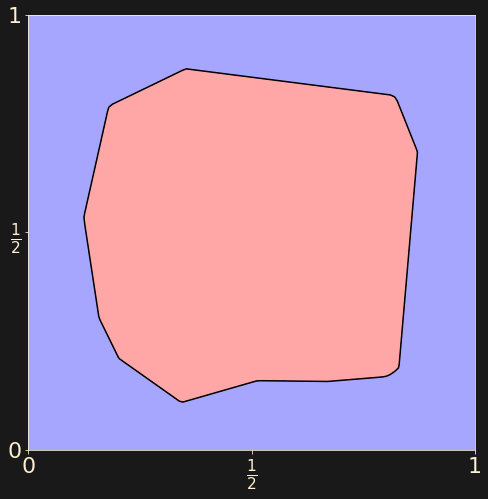

In [18]:
Y = model.predict(x_grid).reshape((n, n))
fig = plt.figure(figsize=(8, 8), facecolor="#191919")

ax = fig.gca()
ax.spines['bottom'].set_color("papayawhip")
ax.spines['top'].set_color("papayawhip") 
ax.spines['right'].set_color("papayawhip")
ax.spines['left'].set_color("papayawhip")

ax.set_xticks([0, 0.5, 1])
ax.set_xticklabels(["0", "$\\frac{1}{2}$", "1"])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(["0", "$\\frac{1}{2}$", "1"])
ax.tick_params(color="papayawhip", labelcolor="papayawhip")

ax.contourf(X0, X1, Y, levels=[0, 0.5, 1], colors=[(0, 0, 1, 0.35), (1, 0, 0, 0.35), (1, 0, 0, 0.35)])
ax.contour(X0, X1, Y, levels=[0.5], colors=['k'])

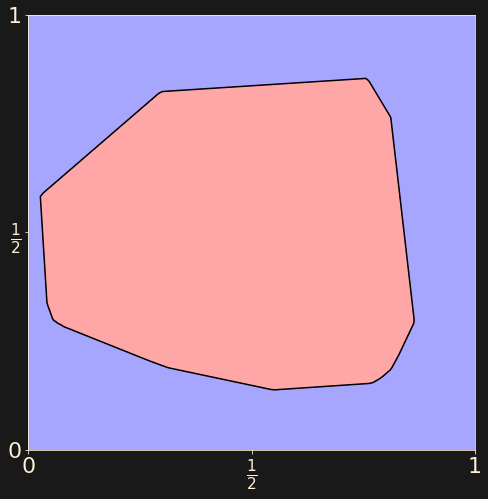

In [25]:
epoch=496
Y = model.predict(x_grid).reshape((n, n))
fig = plt.figure(figsize=(8, 8), facecolor="#191919")

ax = fig.gca()
ax.spines['bottom'].set_color("papayawhip")
ax.spines['top'].set_color("papayawhip") 
ax.spines['right'].set_color("papayawhip")
ax.spines['left'].set_color("papayawhip")

ax.set_xticks([0, 0.5, 1])
ax.set_xticklabels(["0", "$\\frac{1}{2}$", "1"])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(["0", "$\\frac{1}{2}$", "1"])
ax.tick_params(color="papayawhip", labelcolor="papayawhip")

ax.contourf(X0, X1, Y, levels=[0, 0.5, 1], colors=[(0, 0, 1, 0.35), (1, 0, 0, 0.35), (1, 0, 0, 0.35)])
ax.contour(X0, X1, Y, levels=[0.5], colors=['k'])
fig.savefig(f"regions-{epoch:03d}.jpg", facecolor=fig.get_facecolor(), bbox_inches="tight")

In [ ]:
rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.spines['bottom'].set_color("papayawhip")
ax.spines['top'].set_color("papayawhip") 
ax.spines['right'].set_color("papayawhip")
ax.spines['left'].set_color("papayawhip")


ax.set_xticks([0, 0.5, 1])
ax.set_xticklabels(["0", "$\\frac{1}{2}$", "1"])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(["0", "$\\frac{1}{2}$", "1"])
ax.tick_params(color="papayawhip", labelcolor="papayawhip")

print(ax.get_xticks())

ax.contourf(X0, X1, Y, levels=[0, 0.5, 1], colors=[(0, 0, 1, 0.35), (1, 0, 0, 0.35), (1, 0, 0, 0.35)])
ax.contour(X0, X1, Y, levels=[0.5], colors=['k'])

fig.savefig("squares-samples.svg", bbox_inches="tight", transparent=True)

In [15]:
x_test = np.random.uniform(size=(512, 2)) # 512 random data points in unit square
y_test = \
    (np.abs(x_test[:,0] - 0.5) < 0.5/np.sqrt(2)) \
    *(np.abs(x_test[:,1] - 0.5) < 0.5/np.sqrt(2))


In [10]:
y_test

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,